In [551]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [671]:
rng = [20]
relperf = {
    'm3': pd.read_pickle('relperf3m.pkl')[rng].mean(axis=1),
    'm6': pd.read_pickle('relperf6m.pkl')[rng].mean(axis=1),
    'y1': pd.read_pickle('relperf1y.pkl')[rng].mean(axis=1),
    'y2': pd.read_pickle('relperf2y.pkl')[rng].mean(axis=1),
    'y3': pd.read_pickle('relperf3y.pkl')[rng].mean(axis=1),
    'y4': pd.read_pickle('relperf4y.pkl')[rng].mean(axis=1),
    'y5': pd.read_pickle('relperf5y.pkl')[rng].mean(axis=1)
}

relperf = pd.DataFrame(relperf)

In [672]:
relperf

,m3,m6,y1,y2,y3,y4,y5
2009-10-02,0.082947,0.058180,0.086958,-0.147710,-0.497271,-0.287424,-0.126900
2009-10-09,0.042586,0.031564,0.121703,-0.221146,-0.338589,-0.238273,0.060917
2009-10-16,0.504207,0.382217,0.245406,-0.153113,0.190222,0.252728,0.346259
2009-10-23,0.481651,0.356384,0.269256,0.029588,0.429412,0.214581,0.327878
2009-10-30,0.799279,0.649536,0.545122,0.636957,0.669939,0.446305,0.199104
...,...,...,...,...,...,...,...
2019-06-07,-0.582341,-0.715460,0.859490,0.844325,0.298349,-0.040579,-0.488537
2019-06-14,-0.761858,-0.598630,0.678115,0.596995,0.255941,-0.073995,-0.506321
2019-06-21,-0.148869,-0.282467,0.516998,0.539071,0.449344,0.461906,-0.224130
2019-06-28,0.093707,0.553255,0.773456,0.811131,0.690898,0.692583,0.034002


In [673]:
selection_strat = relperf[relperf>=0.5].idxmax(axis=1)
# selection_strat = relperf.idxmax(axis=1)
# selection_strat = relperf.rolling(1).sum().idxmax(axis=1)

result = []

for date, val in selection_strat.shift(1).items():
    try:
        result.append((date, relperf.loc[date, val]))
    except:
        pass
    
result = pd.Series(dict(result))

In [674]:
result

2009-10-23    0.481651
2009-11-06    0.482641
2009-11-13    0.289499
2009-12-04    0.088890
2009-12-18    0.811176
                ...   
2019-06-07    0.859490
2019-06-14    0.678115
2019-06-21    0.516998
2019-06-28    0.811131
2019-07-05   -0.481253
Length: 256, dtype: float64

0.45087921941129583 0.015621791402648402


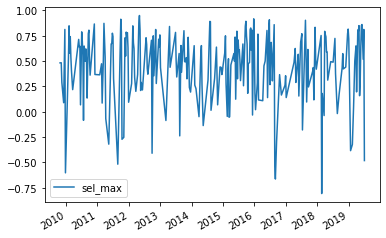

In [675]:
print(result.mean(), relperf['y1'].mean())
# relperf['y1'].plot(label='y1', legend=True)
result.plot(label='sel_max', legend=True)

0.3178535206702753 0.015621791402648402


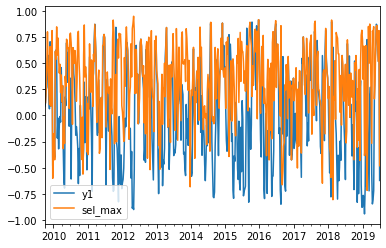

In [556]:
print(result.mean(), relperf['y1'].mean())
relperf['y1'].plot(label='y1', legend=True)
result.plot(label='sel_max', legend=True)

In [314]:
y = relperf.idxmax(axis=1).map({'m3':-1,'m6':0,'y1':1,'y2':2,'y3':3,'y4':4,'y5':5}).shift(-1); y

2009-10-02    1.0
2009-10-09   -1.0
2009-10-16   -1.0
2009-10-23   -1.0
2009-10-30    0.0
             ... 
2019-06-07    1.0
2019-06-14    2.0
2019-06-21    2.0
2019-06-28   -1.0
2019-07-05    NaN
Length: 510, dtype: float64

In [497]:
# clf = KNeighborsClassifier(3)
# clf = SVC(kernel="linear", C=0.025)
clf = SVC(gamma=5, C=5) # 굳
# clf = GaussianProcessClassifier(1.0 * RBF(1.0))
# clf = DecisionTreeClassifier(max_depth=5)
# clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
# clf = MLPClassifier(alpha=1, max_iter=1000)
# clf = AdaBoostClassifier()
# clf = GaussianNB()
# clf = QuadraticDiscriminantAnalysis()

In [547]:
clf = SVC(kernel='linear')
preds = []
nback = 250

for date in y.index[nback-1:-1]:
    try:
        pred = clf.predict(np.array([relperf.loc[date]]))[0]
        preds.append(pred)
    except:
        pass
    
    _x = relperf.loc[:date].iloc[-nback:]
    _y = y.loc[:date].iloc[-nback:]
    clf.fit(_x, _y)

In [548]:
sel2 = pd.Series(preds, index=y.index[nback-1:-1][1:]).map({-1:'m3',0:'m6',1:'y1',2:'y2',3:'y3',4:'y4',5:'y5'}); sel2

2014-07-18    y5
2014-07-25    y1
2014-08-01    y1
2014-08-08    m6
2014-08-15    m3
              ..
2019-05-31    y2
2019-06-07    y2
2019-06-14    y1
2019-06-21    y2
2019-06-28    y2
Length: 259, dtype: object

In [489]:
clf.fit(relperf.iloc[:-1], y.iloc[:-1])
pred = clf.predict(relperf)

In [490]:
sel1 = pd.Series(pred, index=relperf.index).map({-1:'m3',0:'m6',1:'y1',2:'y2',3:'y3',4:'y4',5:'y5'}); sel1

2009-10-02    y1
2009-10-09    m3
2009-10-16    m3
2009-10-23    m3
2009-10-30    m6
              ..
2019-06-07    y1
2019-06-14    y2
2019-06-21    y2
2019-06-28    m3
2019-07-05    y5
Length: 510, dtype: object

In [484]:
np.array([relperf.iloc[-1].values])

array([[ 0.6336852 , -0.17242512, -0.62210415, -0.48125321, -0.57991335,
        -0.34288336,  0.43750001]])